In [1]:
import numpy as np
import warnings
import random
# handle the errors raised by other modules 
warnings.filterwarnings('ignore')

import pandas as pd
#  seaborn provides a high-level interface for drawing attractive and informative statistical graphics.
import seaborn as sns
# Matplotlib is a plotting library for creating static, animated, and interactive visualizations
import matplotlib.pyplot as plt
# Plotly is a versatile plotting library that allows you to create interactive and dynamic visualizations. 
import plotly.graph_objects as go

# model
# sklearn provides efficient tools for data mining and data analysis. 
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier

# pipeline
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import GridSearchCV

In [2]:
# read the csv file using PANDAS , and print only first 4 
data = pd.read_csv("Data/onlinedeliverydata.csv")
data.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,...,Less Delivery time,High Quality of package,Number of calls,Politeness,Freshness,Temperature,Good Taste,Good Quantity,Output,Reviews
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,...,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Yes,Nil\n
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Yes,Nil
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,...,Important,Very Important,Moderately Important,Very Important,Very Important,Important,Very Important,Moderately Important,Yes,"Many a times payment gateways are an issue, so..."
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,...,Very Important,Important,Moderately Important,Very Important,Very Important,Very Important,Very Important,Important,Yes,nil
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,...,Important,Important,Moderately Important,Important,Important,Important,Very Important,Very Important,Yes,NIL


In [3]:
# i want details on exactly each column that i select below and its Data-type 
data = data[["Age","Gender", "Marital Status","Occupation", "Monthly Income", "Educational Qualifications",
             "Family size","latitude", "longitude", "Pin code","Output"]].copy()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    object 
 2   Marital Status              388 non-null    object 
 3   Occupation                  388 non-null    object 
 4   Monthly Income              388 non-null    object 
 5   Educational Qualifications  388 non-null    object 
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Pin code                    388 non-null    int64  
 10  Output                      388 non-null    object 
dtypes: float64(2), int64(3), object(6)
memory usage: 33.5+ KB


In [4]:
# check whether there is some kind of null/None values in each of the column(sum rowise) , true/False => sum() => 1/0
data.isnull().sum()  

Age                           0
Gender                        0
Marital Status                0
Occupation                    0
Monthly Income                0
Educational Qualifications    0
Family size                   0
latitude                      0
longitude                     0
Pin code                      0
Output                        0
dtype: int64

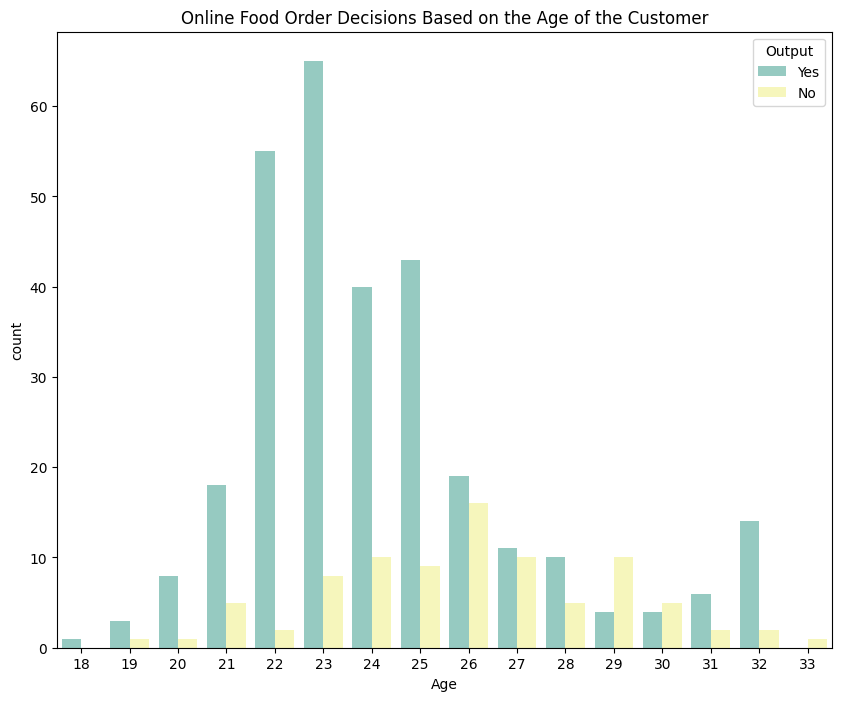

In [5]:
plt.figure(figsize=(10,8))
plt.title("Online Food Order Decisions Based on the Age of the Customer")
# use seaborn module , Set3 => color combination palette , hue=Output is to color bars 
sns.countplot(x='Age',data=data,hue='Output',palette="Set3");

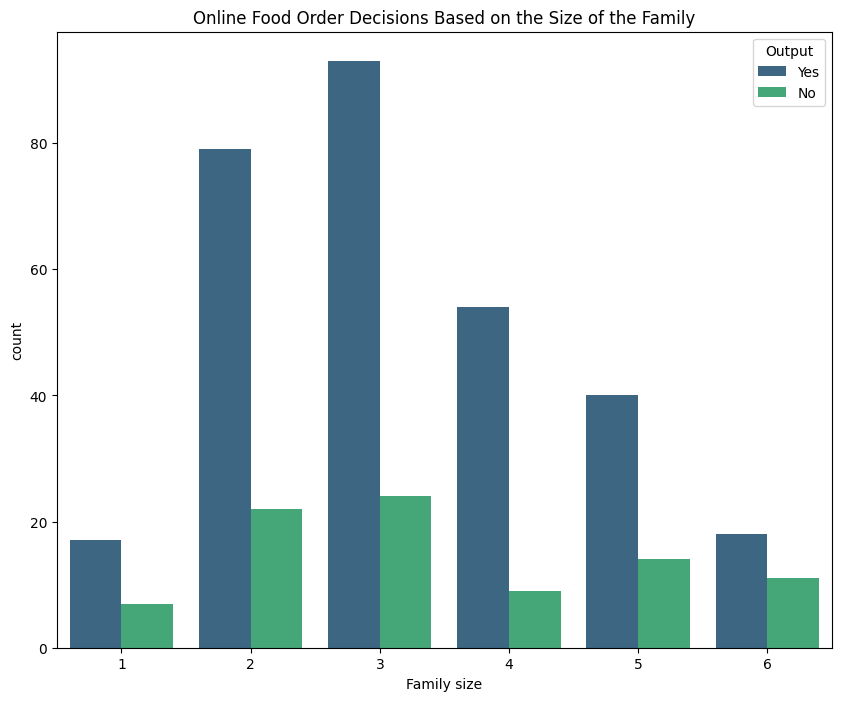

In [6]:
# now clasiify based on Family-Size ,  viridis => color combo , 
plt.figure(figsize=(10,8))
plt.title("Online Food Order Decisions Based on the Size of the Family")
sns.countplot(x='Family size',data=data,hue='Output',palette="viridis");

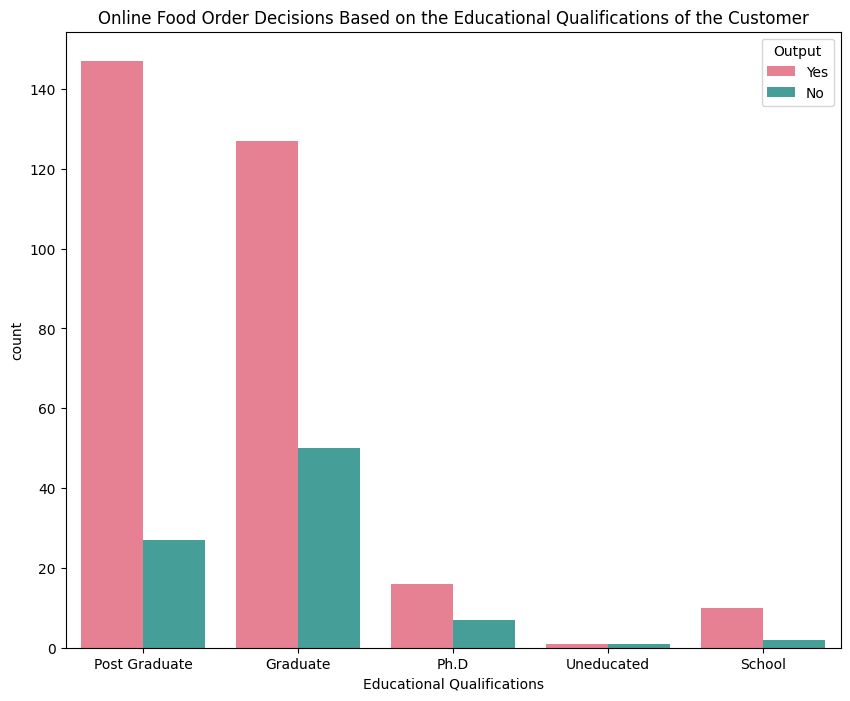

In [7]:
# classify based on educational Qualification of the customer 
plt.figure(figsize=(10,8))
plt.title("Online Food Order Decisions Based on the Educational Qualifications of the Customer")
sns.countplot(x='Educational Qualifications',data=data,hue='Output',palette="husl");

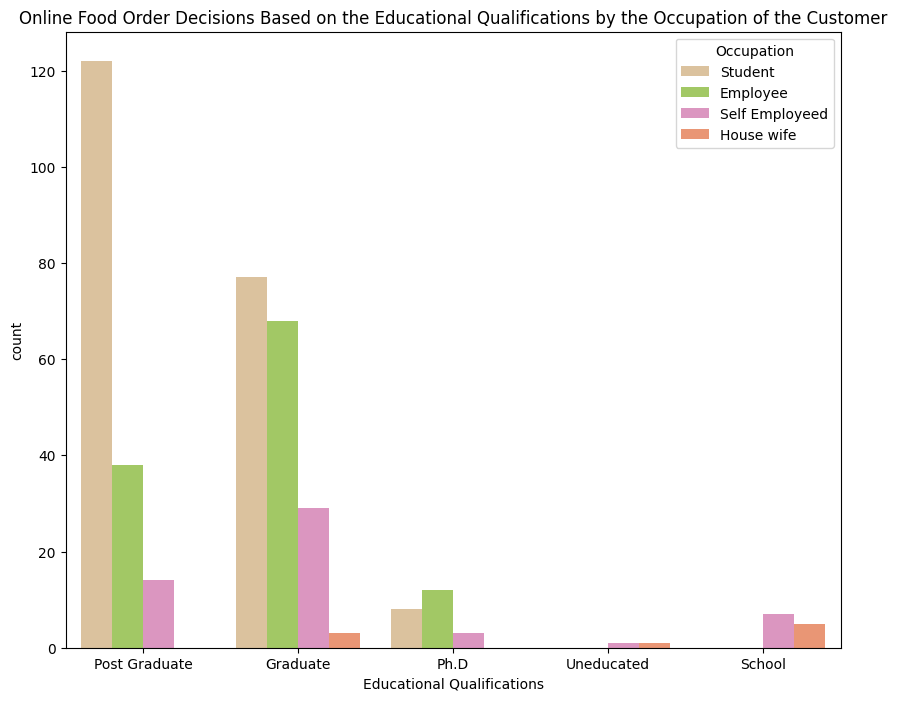

In [8]:
# classify based on Occupation (student, employee, self-employed, house-wife , all in one ) 
plt.figure(figsize=(10,8))
plt.title("Online Food Order Decisions Based on the Educational Qualifications by the Occupation of the Customer")
sns.countplot(x='Educational Qualifications',data=data,hue='Occupation',palette="Set2_r");

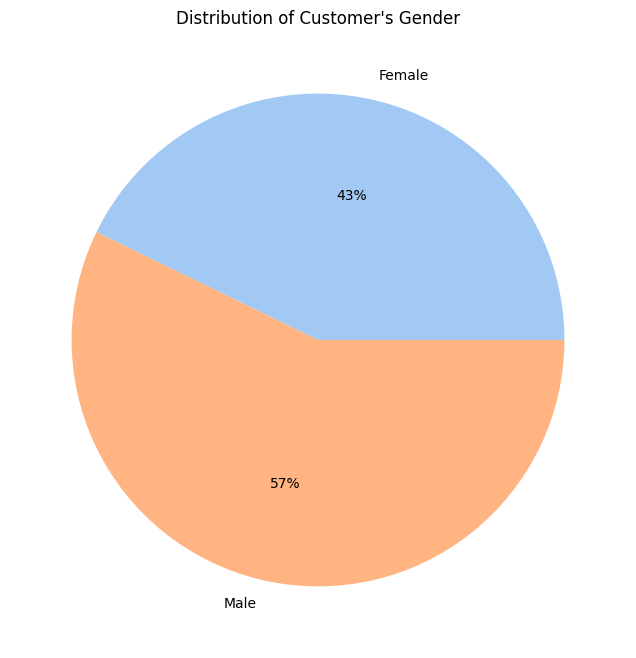

In [9]:
# classify based on MALE and FEMALE , check the column Gender
female = len(data[data["Gender"] == 'Female'])
male = len(data[data["Gender"] == 'Male'])
data_gender = [female,male]
# use labels for PIE-Chart
labels = ['Female', 'Male']

# define colors for chart 
colors = sns.color_palette('pastel')[0:5] # seaborn color palette to use(use only first-5 colors from palette)

# plot the pie-chart 
plt.figure(figsize=(10,8))
plt.title("Distribution of Customer's Gender")
# autopct => percentage formatting on 45.09 => 45 exact 
plt.pie(data_gender, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

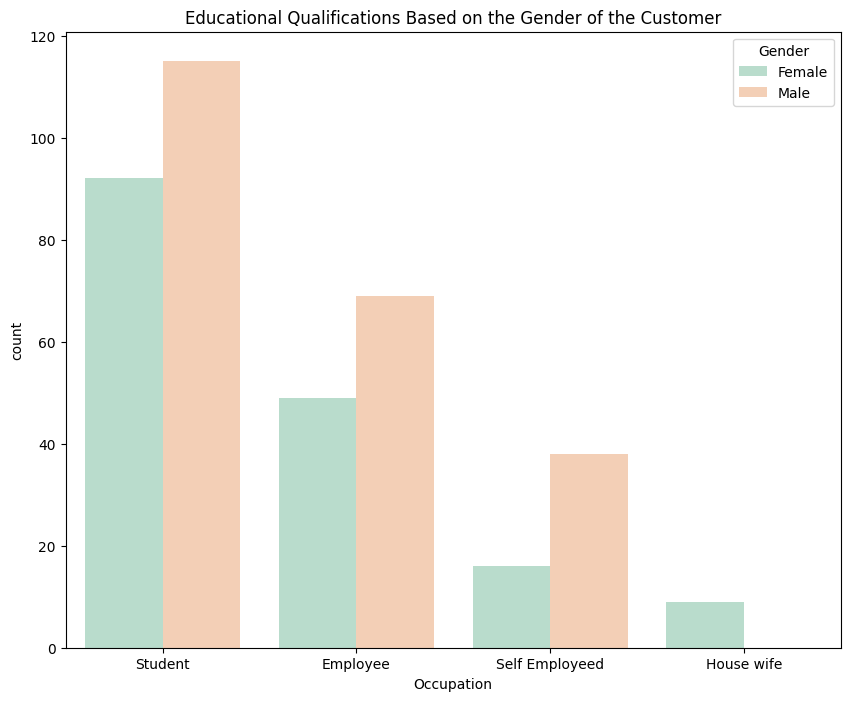

In [10]:
# plot a bar-graph for the same above (gender )
plt.figure(figsize=(10,8))
plt.title("Educational Qualifications Based on the Gender of the Customer")
sns.countplot(x='Occupation',data=data,hue='Gender',palette="Pastel2");

In [11]:
# who will reorder again , check the OutPut-colum , if yes-reorder 
reorder = data[data["Output"] == "Yes"]
gender_data = reorder['Gender'].value_counts()
label = gender_data.index
counts = gender_data.values

colors = sns.color_palette('pastel')[2:4]
# set the figure 1st in form of Pie-Chart 
fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text = "Which Gender is More Likely to Order Online Again?")
# now create the figure using update_traces(marker-dict-of-colors)
fig.update_traces(hoverinfo="label+percent", textinfo="value",marker=dict(colors=colors))

fig.show()

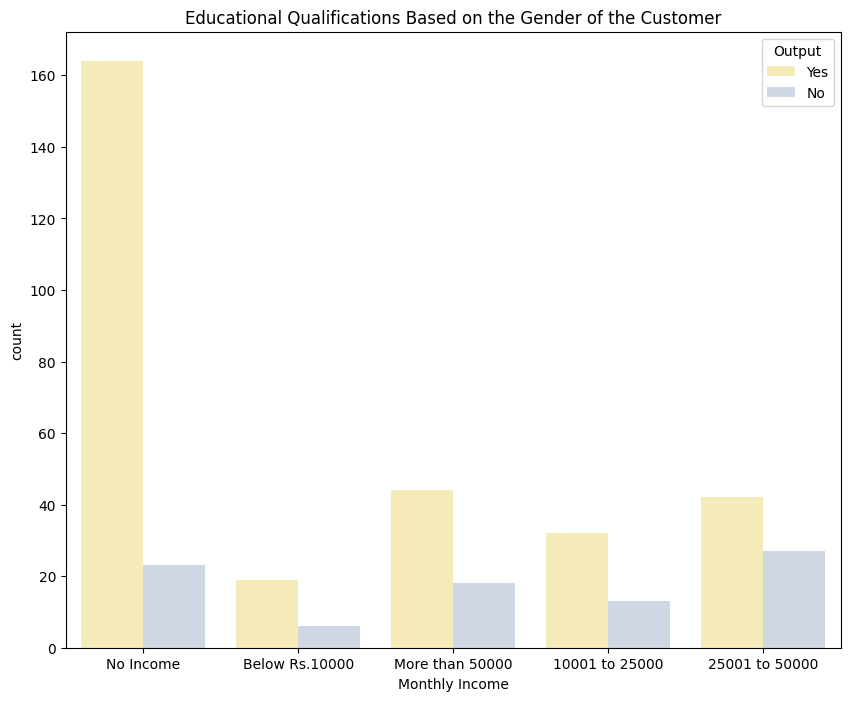

In [12]:
# now classsify based on INCOME 
plt.figure(figsize=(10,8))
plt.title("Educational Qualifications Based on the Gender of the Customer")
sns.countplot(x='Monthly Income',data=data,hue='Output',palette="Pastel2_r");

In [13]:
# classify based on marriage-status of customer  => (yes, no, prefer not to say)
reorder = data[data["Output"] == "Yes"]
status_data = reorder['Marital Status'].value_counts()
label = status_data.index
counts = status_data.values

fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text = "What is the Marital Status of Customers?")
fig.update_traces(hoverinfo="label+percent", textinfo="value",marker=dict(colors=colors))

fig.show()

In [14]:
# prepare the data now , check the unique values from column-Monthly Income(just print once to confirm)
data["Monthly Income"].unique()

array(['No Income', 'Below Rs.10000', 'More than 50000', '10001 to 25000',
       '25001 to 50000'], dtype=object)

In [16]:
# map the data , and change the values to 0 , 1 , 2 => easy to move and classification , easy for machine-learning models
data["Gender"] = data["Gender"].map({"Male":0,"Female":1}) # male or female

data["Marital Status"] = data["Marital Status"].map({"Married":0,"Single":1,"Prefer not to say":2})


data["Occupation"] = data["Occupation"].replace(to_replace=["Employee","Self Employeed"], value=1) # employed
data["Occupation"] = data["Occupation"].replace(to_replace=["Student","House wife"], value=0) # unemployed


data["Educational Qualifications"] = data["Educational Qualifications"].map({"Graduate": 1, 
                                                                             "Post Graduate": 2, 
                                                                             "Ph.D": 3, "School": 4,
                                                                             "Uneducated": 5})


data["Monthly Income"] = data["Monthly Income"].replace(to_replace=["No Income"], value=0) # no income
data["Monthly Income"] = data["Monthly Income"].replace(to_replace=["Below Rs.10000",
                                                                   "More than 50000",
                                                                   "25001 to 50000",
                                                                   "10001 to 25000"], value=1)

data["Output"] = data["Output"].map({"No":0,"Yes":1}) # no or yes

In [17]:
# PREDICTION-MODEL ,  
# separate Output from INPUT
X = data.drop('Output',axis=1)
y = data['Output']

X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=101)

print("Shape of train dataset : ", X_train.shape)
print("Shape of test dataset : ", X_test.shape)

Shape of train dataset :  (310, 10)
Shape of test dataset :  (78, 10)


In [19]:
# remove the nan-values from x 
from sklearn.impute import SimpleImputer

#  Create a SimpleImputer to fill missing values(NAN) with the mean
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform both training and test data
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Print the shape of the imputed datasets
print("Shape of imputed train dataset: ", X_train.shape)
print("Shape of imputed test dataset: ", X_test.shape)

Shape of imputed train dataset:  (310, 7)
Shape of imputed test dataset:  (78, 7)


In [20]:
rfc = RandomForestClassifier(n_estimators=100)

rfc.fit(X_train, y_train)

print(rfc.score(X_test, y_test))

0.8846153846153846


[[11  2]
 [ 7 58]]


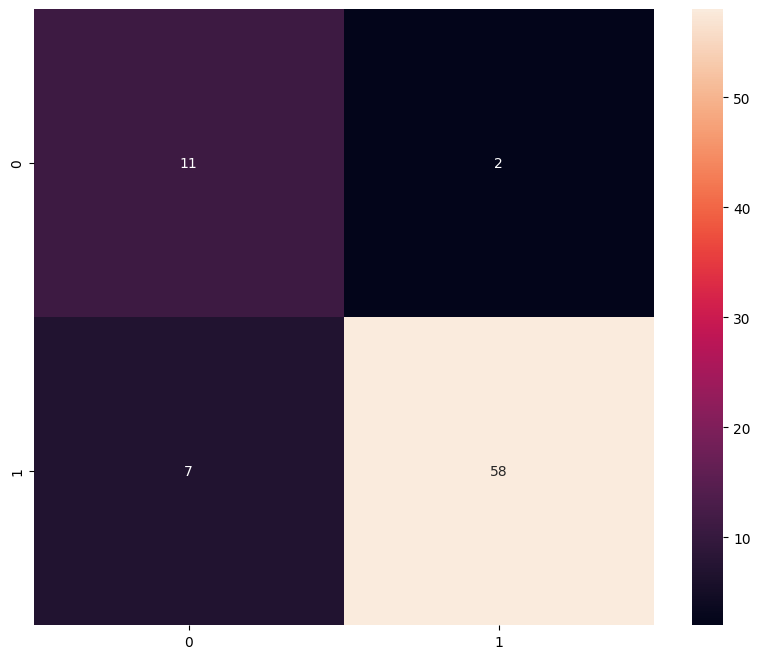

In [21]:
# uses the trained RandomForestClassifier (rfc) to make predictions on the test set (X_test).
pred = rfc.predict(X_test)

print(confusion_matrix(pred,y_test))

plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(pred,y_test), annot=True);
# o/p :  tn = 11 , fp=2,  fn=7 , tp=58,  (t=true, f=false, p=positive, n=negative )

In [22]:
# Evaluating a score by cross-validation
# cv determines the cross-validation splitting strategy, number of folds for cross-validation, CV=5 FOLDS
scores = cross_val_score(rfc, X_train, y_train,cv=5)

# average score and standard-deviation 
print("Accuracy: ", scores.mean(), scores.std() * 2)

Accuracy:  0.8548387096774194 0.04080358271185002


In [23]:
# parameter search 
parameters = {
    'randomforestclassifier__n_estimators': (20, 50, 100)
}

pipeline = make_pipeline(RandomForestClassifier())

pipeline

Pipeline(steps=[('randomforestclassifier', RandomForestClassifier())])

In [24]:
# search sync with n_jobs, hyperparameter, 
# make_pipeline(RandomForestClassifier()). It represents the sequence of data processing steps followed by the model.
gridsearch = GridSearchCV(pipeline, parameters, verbose=1, n_jobs= -1)

In [25]:
# execute the grid-search now => it takes a lot of time 
gridsearch.fit(X_train,y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(estimator=Pipeline(steps=[('randomforestclassifier',
                                        RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__n_estimators': (20, 50, 100)},
             verbose=1)

In [26]:
# i want the best-estimator(model) from above grid-search 
print("Best score %0.3f" % gridsearch.best_score_)
print("Best parameters set: ")
best_parameters = gridsearch.best_estimator_.get_params()

for params in sorted(parameters.keys()):
    print("\t%s: %r" % (params, best_parameters[params]))

Best score 0.858
Best parameters set: 
	randomforestclassifier__n_estimators: 50


In [33]:
# have a cutomer with app , will he order ? predict THE THING 

# PERFORM ONE-HOT-TECHNIQUE TO AVOID ERRORS 

# Function to generate random customer data without NaNs
def generate_random_customer():
    age = random.randint(18, 65)
    gender = random.choice(['Male', 'Female'])
    marital_status = random.choice(['Married', 'Single'])
    occupation = random.choice(['Student', 'Employee', 'Self Employed', 'House wife'])
    monthly_income = random.choice(['No Income', 'Below Rs.10000', '10001 to 25000', '25001 to 50000', 'More than 50000'])
    education = random.choice(['School', 'Uneducated', 'Graduate', 'Post Graduate', 'Ph.D'])
    family_size = random.randint(1, 10)
    latitude = np.random.uniform(12.8, 13.2)
    longitude = np.random.uniform(77.4, 77.9)
    pin_code = random.randint(560001, 560100)

    # Create a dictionary with the generated values
    new_customer_data = {
        'Age': age,
        'Gender': gender,
        'Marital Status': marital_status,
        'Occupation': occupation,
        'Monthly Income': monthly_income,
        'Educational Qualifications': education,
        'Family size': family_size,
        # solved error : U CANNOT ADD FAKE DETAILS LIKE ADDITIONAL FEATURES 
    }

    # Create a DataFrame with a single row using the generated values
    new_customer = pd.DataFrame([new_customer_data])

    # Perform one-hot encoding for categorical variables
    new_customer_encoded = pd.get_dummies(new_customer, columns=['Gender', 'Marital Status', 'Occupation', 'Monthly Income', 'Educational Qualifications'])

    return new_customer_encoded

# Generate a random customer without NaNs
new_customer = generate_random_customer()

# Print the generated data
print("Generated Data for New Customer:")
print(new_customer)

Generated Data for New Customer:
   Age  Family size  Gender_Female  Marital Status_Married  \
0   55            8           True                    True   

   Occupation_Employee  Monthly Income_25001 to 50000  \
0                 True                           True   

   Educational Qualifications_Graduate  
0                                 True  


In [34]:
# Make a prediction with the RandomForestClassifier (it is female  + married  + 55-AGE + 8 FAMILY-MEMBERS (OUT OF 7 FEATURES , 4 ARE NOT SUPPORTING ) => (ALL-FEATURES OF NOT ORDERING ) => 0  )
prediction = rfc.predict(new_customer.values)
print("Predicted Output:", prediction)

Predicted Output: [0]
